In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/shivamb/netflix-shows/netflix_titles.csv
/kaggle/input/netflix-shows/Netflix Shows.csv


In [ ]:
#Business objective
#The primary objective of this project is to understand the Netflix content and how the content is distributed amongst various genres, directors etc. 

In [5]:
#Reading the csv file into a dataframe
#Getting to know the data
df_netflix = pd.read_csv('/kaggle/input/d/shivamb/netflix-shows/netflix_titles.csv')
df_netflix.info
df_netflix.head()
df_netflix.shape
df_netflix.dtypes

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
#Data cleaning
#Checking for null values
df_netflix.isna()
df_netflix.isna().any()

#Counting missing values
df_netflix.isna().sum()

#Total number of missing values
df_netflix.isna().sum().sum()

#Filling the missing ones with some text
df_netflix.director.fillna('Director name unavailable')
df_netflix.cast.fillna('Cast info unavailable')
df_netflix.country.fillna('country missing')
df_netflix.date_added.fillna('date_added missing')

In [ ]:
#Checking to see if any duplicates available
df_netflix.drop_duplicates() #No duplicate rows found
df_netflix.shape

#Checking to see if the show_id is unique and if it can be used as an index
df_netflix.show_id.is_unique

#Setting show_id as index
df_netflix.set_index('show_id')

In [ ]:
#Changing datatype of the date_added column to date
pd.to_datetime(df_netflix.date_added)

<AxesSubplot:title={'center':'Distribution by Content Type'}, ylabel='show_id'>

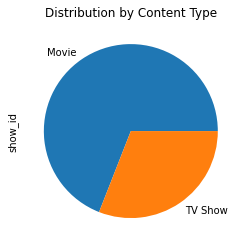

In [8]:
#Analysis
#Question 1  - How many movies compared to TV show
dist = df_netflix.groupby("type")["show_id"].count()
dist.plot(kind= "pie", title = 'Distribution by Content Type')
df_netflix['type'].value_counts()

In [10]:
# Question 2 - Who are the top 10 directors based on the no of movies/Shows they have on netflix
import plotly.express as px
famous_director = df_netflix['director'].value_counts().head(10).to_frame().reset_index()
famous_director.columns = ['director','Count']
# Visualize
px.bar(famous_director.sort_values('Count'), 
       x = 'Count', 
       y = 'director', 
       title = 'Top 10 Director',
       orientation = 'h',
       color_discrete_sequence=["green"])

In [13]:
#Creating a new field called duration new which only contains the actual duration and is numeric
#Creating 2 separate datframes for Movies and TV shows
df_netflix['Duration_new']= df_netflix['duration'].str.split(' ', expand = True)[0]
df_netflix.head()
pd.to_numeric(df_netflix['Duration_new'])
Netflix_movies = df_netflix[df_netflix.type == 'Movie']
Netflix_shows = df_netflix[df_netflix.type == 'TV Show']


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



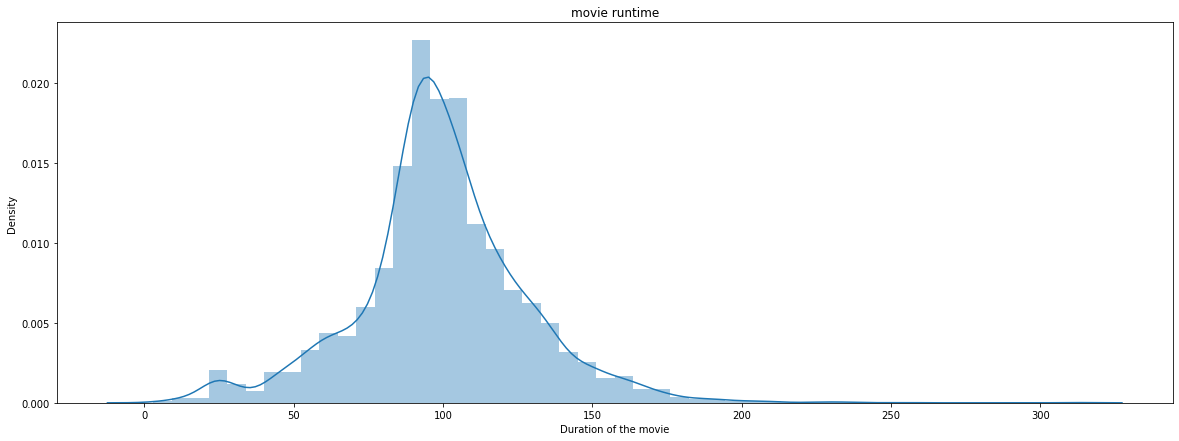

In [14]:
#Question 3 - What is the netflix movie assortment based on their run time
import matplotlib.pyplot as plt
plt.figure(figsize= [20,7])
g = sns.distplot(Netflix_movies['Duration_new'])
g.axes.set_title('movie runtime')
g.set_xlabel('Duration of the movie')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



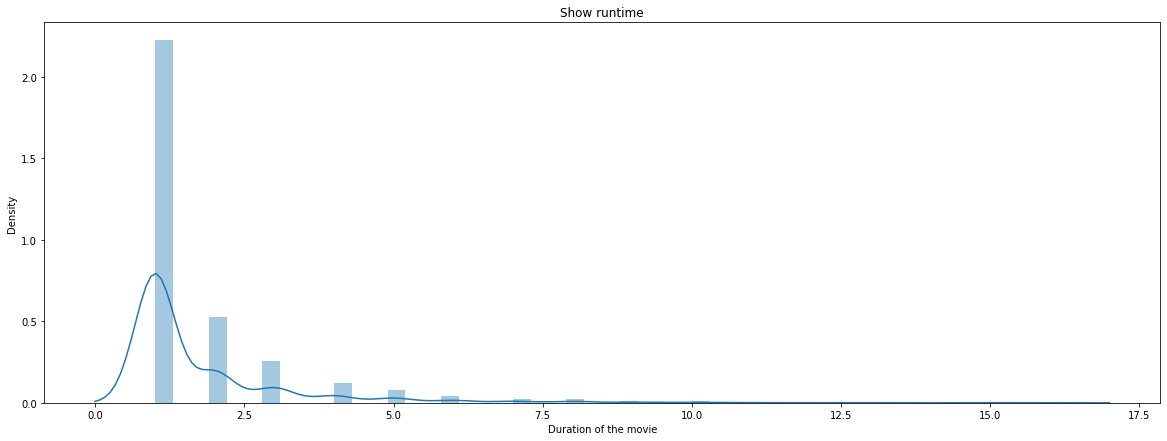

In [15]:
#Question 3(ii) - What is the netflix shows assortment based on their run time

plt.figure(figsize= [20,7])
g = sns.distplot(Netflix_shows['Duration_new'])
g.axes.set_title('Show runtime')
g.set_xlabel('Duration of the movie')
plt.show()

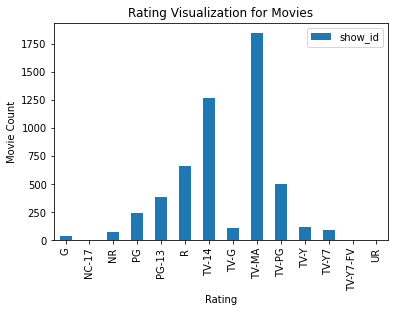

In [16]:
#Question 4  -  How many movies for each rating type?
rating_group = Netflix_movies[['rating', 'show_id']].groupby('rating').count()
# Visualizing the data
rating_group.plot(kind='bar', title='Rating Visualization for Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Count')
plt.show()



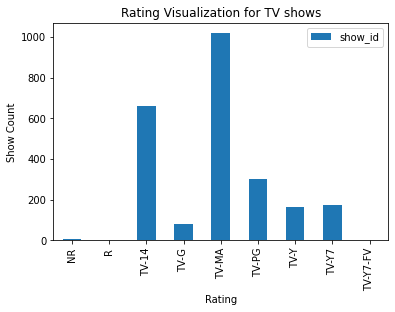

In [17]:
#How many TV shows for each rating type?

rating_tv_shows = Netflix_shows[['rating', 'show_id']].groupby('rating').count()
# use a visualization to display that same data, including a title and x and y labels
rating_tv_shows.plot(kind='bar', title='Rating Visualization for TV shows')
plt.xlabel('Rating')
plt.ylabel('Show Count')
plt.show()

In [ ]:
# #Question 5 - How many movies released per year?
# Netflix_movies["release_year"].value_counts()
# sns.stripplot(x="release_year", y="show_id", data=Netflix_movies, jitter=True);
# print(' Movies released per year')

<AxesSubplot:xlabel='release_year'>

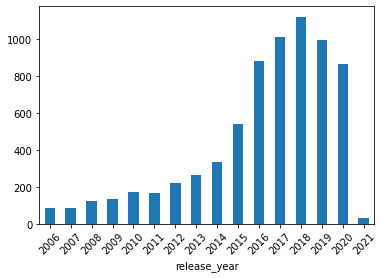

In [19]:
#Question 5 - How many shows released per year after 2005?
release = df_netflix[df_netflix["release_year"] > 2005].groupby('release_year')['show_id'].count()
release.plot(kind= 'bar', rot= 45)

<AxesSubplot:xlabel='release_year'>

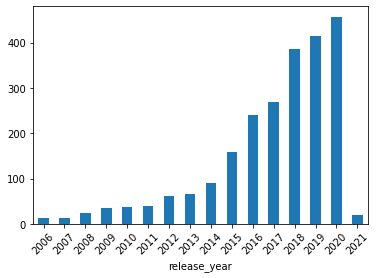

In [18]:
#Question 5 - How many shows released per year after 2005?
release = Netflix_shows[Netflix_shows["release_year"] > 2005].groupby('release_year')['show_id'].count()
release.plot(kind= 'bar', rot= 45)

In [ ]:
#Question 5 - How many movies released per year after 2005?
release = Netflix_movies[Netflix_movies["release_year"] > 2005].groupby('release_year')['show_id'].count()
release.plot(kind= 'bar', rot= 45)

In [21]:
#categorising the genres
df2 = df_netflix
df2['listed_in_1'] = df2["listed_in"].str.split(',')

df3 = df2.explode("listed_in_1")
df3
df3['listed_in_1'].value_counts()

df3.groupby('listed_in_1')['show_id'].count()
                           


listed_in_1
 Anime Features               38
 Children & Family Movies     30
 Classic & Cult TV             6
 Classic Movies               26
 Comedies                    397
                            ... 
TV Dramas                     62
TV Horror                     10
TV Sci-Fi & Fantasy            1
TV Shows                      12
Thrillers                     49
Name: show_id, Length: 73, dtype: int64

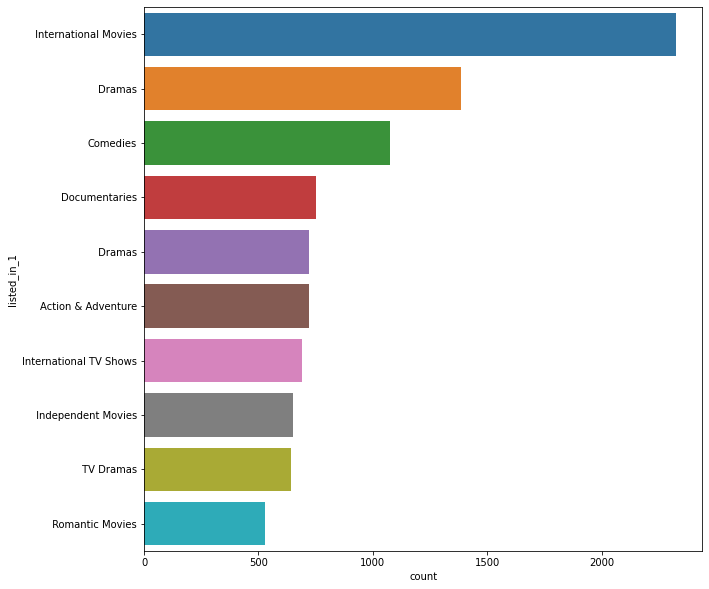

In [22]:
#Question 6 - Top 10 genres based on no of movies/shows                           
plt.figure(figsize=(10,10))
g = sns.countplot(y = df3['listed_in_1'], order=df3['listed_in_1'].value_counts().index[:10])
plt.show()